<div class="mark">
Part I: FEATURE ENGINEERING AND MODEL PREPARATION</div><i class="fa fa-lightbulb-o "></i>

In [1]:
# STEP 1- importing packages and loading data.

# importing libraries
#import pandas as pd # data science essentials
#import matplotlib.pyplot as plt # essential graphical output
#import seaborn as sns # enhanced graphical output
#import numpy as np
#import statsmodels.formula.api as smf

# setting pandas print options
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)


# specifying file name
#file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
#chef = pd.read_excel(io=file)

In [2]:
# dealing with gender
#import random as rand 
#import gender_guesser.detector as gender
#rand.seed(a = 327)

#placeholder_lst=[]
#for name in chef["FIRST_NAME"]: 
#    guess = gender.Detector().get_gender(name)
    #print(guess) 
 #   placeholder_lst.append(guess)#print(guess) placeholder_lst.append(guess)
    
#chef['gender'] = pd.Series(placeholder_lst) # store this, so it won't run again. chef['gender_guess'] = gender

In [3]:
#chef.to_excel('./Apprentice_Chef_Dataset.xlsx',
#                 index = False) # save gender to this excel after running gender guesser

I used the above code to create a new column 'gender'. 
The original excel 'Apprentice_Chef_Dataset.xlsx' is added with a new column 'gender'.
Please use my zip file. Thanks.

In [4]:


# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np
import statsmodels.formula.api as smf

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name. a new column gender is added to this dataset
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(io=file) 

In [5]:
#Feature engineering emails.

#Using EMAIL to get the domain out and then catogorize the email domains
# step a

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [6]:
# step b: remove ".com" from domains
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in email_df.iterrows():
    
    
    replace_email = email_df.iloc[index, 1].replace('.com','')

    placeholder_lst.append(replace_email)
    
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0
0,unitedhealth
1,ge.org
2,jnj
3,ge.org
4,jnj
...,...
1941,yahoo
1942,yahoo
1943,gmail
1944,yahoo


In [7]:
#step c, removing ".org" in domains
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in email_df.iterrows():
    
    
    replace_email = email_df.iloc[index, 0].replace('.org','')
  
    placeholder_lst.append(replace_email)
    
email_df = pd.DataFrame(placeholder_lst)


# displaying the results

email_df
email_df['EMAIL_domain']=email_df.iloc[:,0]
email_df.head()

,0,EMAIL_domain
0,unitedhealth,unitedhealth
1,ge,ge
2,jnj,jnj
3,ge,ge
4,jnj,jnj


In [8]:
# STEP d: concatenating with original DataFrame

# safety measure in case of multiple concatenations
#chef = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ["0" , "EMAIL_domain"]


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df["EMAIL_domain"]],
                   axis = 1)


# printing value counts of personal_email_domain
#chef.loc[: ,'EMAIL_domain'].value_counts()

In [9]:
# STEP e: Categorize email domains to personal,business, and junk
personal_email_domains = ['gmail', 'protonmail','yahoo']
business_email_domains  = ['homedepot','intel','unitedtech','cisco','goldmansacs',
                              'jpmorgan','visa','pfizer','disney','walmart','unitedhealth',
'boeing','caterpillar','verizon','pg','dupont','ibm','chevron','microsoft', 
'travelers','exxon','amex','cocacola','mcdonalds','merck','jnj','apple','nike',          
'ge','mmm']
junk_email_domains = ['me','aol','hotmail','live','msn','passport']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['EMAIL_domain']:
    
    if domain in personal_email_domains:
        placeholder_lst.append('personal_email')
        

    elif domain in business_email_domains:
        placeholder_lst.append('business_email')


    else:
        placeholder_lst.append('junk_email')


# concatenating with original DataFrame
chef['DOMAIN_group'] = pd.Series(placeholder_lst)


# checking results
chef['DOMAIN_group'].value_counts()

personal_email    861
business_email    696
junk_email        389
Name: DOMAIN_group, dtype: int64

In [10]:
# STEP f, Getting dummy variables from catogory variable"EMAIL_domain"
# one hot encoding categorical variables
one_hot_email       = pd.get_dummies(chef['DOMAIN_group'])





# joining codings together
chef = chef.join([one_hot_email])

In [11]:
# Ordinary meal set
chef['ordinary_meals_ordered']= chef['TOTAL_MEALS_ORDERED'] - chef['UNIQUE_MEALS_PURCH']

In [12]:
# total logins
chef['total_logins'] = chef['MOBILE_LOGINS'] + chef['PC_LOGINS']

#total time visiting
chef['total_time_visiting']=chef['AVG_TIME_PER_SITE_VISIT']*(chef['MOBILE_LOGINS']+chef['PC_LOGINS'])

#total clicks
chef['total_clicks'] =chef['AVG_CLICKS_PER_VISIT']*(chef['MOBILE_LOGINS']+chef['PC_LOGINS'])

#avg revenue per meal
chef['avg_revenue_per_meal'] = chef['REVENUE']/chef['TOTAL_MEALS_ORDERED']

In [13]:
# according to the case. regular meal set ranges from $10- $23. wine costs from $7 to $25.
# make an assumption: if avg_revenue_per_meal greater than $40, client has a hobby to order alcohol.

chef['like_alcohol'] = 0

for index, value in chef.iterrows():
    
    
    if chef.loc[index, 'avg_revenue_per_meal'] > 40:
        chef.loc[index, 'like_alcohol'] = 1


In [14]:
# total order times per customer per year
chef['total_order_times'] = chef['TOTAL_MEALS_ORDERED']/chef['LARGEST_ORDER_SIZE']

In [15]:
#log transforming

chef['log_REVENUE'] = np.log10(chef['REVENUE'])
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_AVG_PREP_VID_TIME']=np.log10(chef['AVG_PREP_VID_TIME'])
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])
chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef.loc[:, 'UNIQUE_MEALS_PURCH'])
chef["log_CONTACTS_W_CUSTOMER_SERVICE"]=np.log10(chef.loc[:,"CONTACTS_W_CUSTOMER_SERVICE"])
chef['log_PRODUCT_CATEGORIES_VIEWED']=np.log10(chef.loc[:,"PRODUCT_CATEGORIES_VIEWED"])
chef["log_AVG_CLICKS_PER_VISIT"]=np.log10(chef.loc[:,"AVG_CLICKS_PER_VISIT"])
chef['log_total_order_times']=np.log10(chef.loc[:,"total_order_times"])

In [16]:
# creating binary if counts of 0s is greater than 100.
chef['has_WEEKLY_PLAN']   = 0
chef['has_VIEWED_PHOTOS'] = 0
chef['has_EARLY_DELIVERIES'] = 0
chef['has_LATE_DELIVERIES'] = 0
chef['has_MASTER_CLASSES_ATTENDED'] = 0
chef['has_CANCELLATIONS_BEFORE_NOON'] = 0
chef['has_CANCELLATIONS_AFTER_NOON'] = 0
chef['has_REFRIGERATED_LOCKER'] = 0
chef['has_PACKAGE_LOCKER'] = 0

#rating 1,2,3,4,5
chef['MEDIAN_MEAL_RATING_1'] = 0
chef['MEDIAN_MEAL_RATING_2'] = 0
chef['MEDIAN_MEAL_RATING_3'] = 0
chef['MEDIAN_MEAL_RATING_4'] = 0
chef['MEDIAN_MEAL_RATING_5'] = 0

#flagging missing family name
chef['m_FAMILY_NAME']   = 0

#creating dummies from gender
chef['FEMALE'] = 0
chef['MALE'] = 0
chef['UNKNOWN_GENDER'] = 0



for index, value in chef.iterrows():
    
    # has weekly plan
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_WEEKLY_PLAN'] = 1

    #viewed photos or not
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'has_VIEWED_PHOTOS'] = 1
        
    # has early deliveries or not
    if chef.loc[index, 'EARLY_DELIVERIES'] > 0:
        chef.loc[index, 'has_EARLY_DELIVERIES'] = 1

    #has late deliveries or not
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'has_LATE_DELIVERIES'] = 1
        
    #attended classes or not
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'has_MASTER_CLASSES_ATTENDED'] = 1   
        
    # has cancel before noon
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'has_CANCELLATIONS_BEFORE_NOON'] = 1 
    # has cancel after noon
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1 
        
    # has refrigerated locker 
    if chef.loc[index, 'REFRIGERATED_LOCKER'] > 0:
        chef.loc[index, 'has_REFRIGERATED_LOCKER'] = 1
    # has package locker
    if chef.loc[index, 'PACKAGE_LOCKER'] > 0:
        chef.loc[index, 'has_PACKAGE_LOCKER'] = 1
        
    # Rating level 1, 2, 3, 4, 5
    if chef.loc[index, 'MEDIAN_MEAL_RATING'] == 1:
        chef.loc[index, 'MEDIAN_MEAL_RATING_1'] = 1
        
    if chef.loc[index, 'MEDIAN_MEAL_RATING'] == 2:
        chef.loc[index, 'MEDIAN_MEAL_RATING_2'] = 1
        
    if chef.loc[index, 'MEDIAN_MEAL_RATING'] == 3:
        chef.loc[index, 'MEDIAN_MEAL_RATING_3'] = 1
        
    if chef.loc[index, 'MEDIAN_MEAL_RATING'] == 4:
        chef.loc[index, 'MEDIAN_MEAL_RATING_4'] = 1
        
    if chef.loc[index, 'MEDIAN_MEAL_RATING'] == 5:
        chef.loc[index, 'MEDIAN_MEAL_RATING_5'] = 1
        
      # gender-  FEMALE, MALE, UNKNOWN  
    if chef.loc[index, 'FAMILY_NAME'] == 'NaN' or chef.loc[index, 'FAMILY_NAME'] == chef.loc[index, 'FIRST_NAME']: 
        chef.loc[index, 'm_FAMILY_NAME'] = 1
        
    if chef.loc[index, 'gender'] == 'female' or chef.loc[index, 'gender'] == 'mostly_female':
        chef.loc[index, 'FEMALE'] =1
        
    if chef.loc[index, 'gender'] == 'male' or chef.loc[index, 'gender'] == 'mostly_male':
        chef.loc[index, 'MALE'] =1
        
    if chef.loc[index, 'gender'] == 'unknown' or chef.loc[index, 'gender'] == 'andy':
        chef.loc[index, 'UNKNOWN_GENDER'] =1
    
   

        

In [17]:

#dropping columns


# can't run more than one time
chef = chef.drop('NAME', axis = 1)
chef = chef.drop('EMAIL', axis = 1)
chef = chef.drop('FIRST_NAME', axis = 1)
chef = chef.drop('FAMILY_NAME', axis = 1)
chef = chef.drop('gender', axis = 1)

chef = chef.drop('EMAIL_domain', axis = 1)
chef = chef.drop('DOMAIN_group', axis = 1)

In [18]:

# saving engineered dataset in Excel
chef.to_excel('./chef_ready_class.xlsx',
                 index = False)

<span class="mark">Part II- Classification Modeling</span>

In [19]:

# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler


# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer                    # customizable scorer

from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
chef_class = pd.read_excel('./chef_ready_class.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef_class.head(n = 10)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,business_email,junk_email,personal_email,ordinary_meals_ordered,total_logins,total_time_visiting,total_clicks,avg_revenue_per_meal,like_alcohol,total_order_times,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_TOTAL_MEALS_ORDERED,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_CLICKS_PER_VISIT,log_total_order_times,has_WEEKLY_PLAN,has_VIEWED_PHOTOS,has_EARLY_DELIVERIES,has_LATE_DELIVERIES,has_MASTER_CLASSES_ATTENDED,has_CANCELLATIONS_BEFORE_NOON,has_CANCELLATIONS_AFTER_NOON,has_REFRIGERATED_LOCKER,has_PACKAGE_LOCKER,MEDIAN_MEAL_RATING_1,MEDIAN_MEAL_RATING_2,MEDIAN_MEAL_RATING_3,MEDIAN_MEAL_RATING_4,MEDIAN_MEAL_RATING_5,m_FAMILY_NAME,FEMALE,MALE,UNKNOWN_GENDER
0,393.00,1,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,1,0,0,8,7,336.00,119,28.071429,0,14.0,2.594393,1.681241,1.523746,1.146128,0.778151,1.079181,1.000000,1.230449,1.146128,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1
1,1365.00,1,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,1,0,0,84,6,242.10,78,15.689655,0,87.0,3.135133,1.605844,1.928396,1.939519,0.477121,0.903090,0.903090,1.113943,1.939519,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,800.00,1,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,1,0,0,8,7,138.39,112,53.333333,1,15.0,2.903090,1.296007,1.799341,1.176091,0.845098,1.041393,0.698970,1.204120,1.176091,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,600.00,1,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,1,0,0,7,7,630.00,98,46.153846,1,13.0,2.778151,1.954243,1.641474,1.113943,0.778151,1.041393,0.698970,1.146128,1.113943,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,1490.00,1,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,1,0,0,39,6,242.28,72,31.702128,0,47.0,3.173186,1.606166,1.928396,1.672098,0.903090,0.778151,1.000000,1.079181,1.672098,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
5,1550.00,1,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0,0,0,1,34,5,950.90,60,43.055556,1,36.0,3.190332,2.279165,1.896526,1.556303,0.301030,0.954243,0.000000,1.079181,1.556303,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0
6,1430.00,1,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169,1,0,0,54,7,1079.40,84,23.442623,0,61.0,3.155336,2.188084,1.928396,1.785330,0.845098,0.778151,0.301030,1.079181,1.785330,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1
7,1321.25,1,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0,1,0,0,12,7,1601.11,105,101.634615,1,13.0,3.120985,2.359323,1.799341,1.113943,0.000000,1.079181,0.477121,1.176091,1.113943,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,1505.00,1,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0,1,0,0,15,7,99.82,126,94.062500,1,16.0,3.177536,1.154120,1.799341,1.204120,0.000000,1.079181,0.698970,1.255273,1.204120,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
9,1493.00,0,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147,1,0,0,92,7,344.82,98,15.715789,0,95.0,3.174060,1.692494,1.928396,1.977724,0.477121,0.778151,0.903090,1.146128,1.977724,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [20]:
#UDF FUNCTION
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [21]:
#UDF FUNCTION
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [22]:
#UDF FUNCTION
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./Feature_Importance.png')

In [23]:
# declaring explanatory variables
chef_class_data = chef_class.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_class_target = chef_class.loc[ : , 'CROSS_SELL_SUCCESS']

In [24]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_class_data,
            chef_class_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_class_target)


# merging training data for statsmodels
chef_class_train = pd.concat([x_train, y_train], axis = 1)

In [25]:


print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [26]:
#for val in chef_class_data:
#    print(f" {val} + ")

In [27]:
# instantiating a logistic regression model object. 
# Prepare x-variables sets
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 REFRIGERATED_LOCKER + 
 m_FAMILY_NAME + 
 FEMALE + 
 MALE + 
 personal_email + 
 junk_email+
 CONTACTS_W_CUSTOMER_SERVICE+
 EARLY_DELIVERIES+
 like_alcohol+
 has_MASTER_CLASSES_ATTENDED

 """,
    data    = chef_class_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.516824
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                           14
Date:                Mon, 05 Jul 2021   Pseudo R-squ.:                  0.1770
Time:                        10:15:03   Log-Likelihood:                -754.05
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 9.978e-61
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1916      0.306     -0.626      0.531      -0.791       0.408
MOBILE_NUMBER                   0.9597      0.182      5.272      0.000       0.603       1.316
CANCELLATIONS_BEFORE_NOON       0.2916      0.048      6.070      0.000       0.197       0.386
CANCELLATIONS_AFTER_NOON       -0.2925      0.146     -2.001      0.045      -0.579      -0.006
TASTES_AND_PREFERENCES          0.3303      0.139      2.369      0.018       0.057       0.603
REFRIGERATED_LOCKER             0.5724      0.217      2.642      0.008       0.148       0.997
m_FAMILY_NAME                  -1.2091      0.137     -8.843      0.000      -1.477      -0.941
FEMALE                         -0.7154      0.229     -3.123      0.002      -1.164      -0.266
MALE                            0.3462      0.169      2.054      0.040       0.016       0.677
personal_email                 -0.6067      0.149     -4.078      0.000      -0.898      -0.315
junk_email                     -1.9986      0.178    -11.242      0.000      -2.347      -1.650
CONTACTS_W_CUSTOMER_SERVICE     0.0754      0.030      2.534      0.011       0.017       0.134
EARLY_DELIVERIES                0.0530      0.028      1.866      0.062      -0.003       0.109
like_alcohol                   -0.2948      0.141     -2.094      0.036      -0.571      -0.019
has_MASTER_CLASSES_ATTENDED     0.2713      0.127      2.129      0.033       0.022       0.521
===============================================================================================
"""

In [28]:


# creating a dictionary to store candidate models

candidate_dict = {
  # significant variables only(set1)
 'logit_sig1'    : [ 'MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                    'REFRIGERATED_LOCKER', 'm_FAMILY_NAME', 'FEMALE','MALE','personal_email','junk_email',
                    'CONTACTS_W_CUSTOMER_SERVICE','EARLY_DELIVERIES','MEDIAN_MEAL_RATING'],
    
 # significant variables only (set 2)- insignt from tree feature importance
 'logit_sig2'    : [ 'MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                    'REFRIGERATED_LOCKER', 'm_FAMILY_NAME', 'FEMALE','MALE','personal_email','junk_email',
                    'CONTACTS_W_CUSTOMER_SERVICE','EARLY_DELIVERIES','like_alcohol','has_MASTER_CLASSES_ATTENDED'],

 # significant variables only(set 3) 

 'logit_sig3'    : [ 'MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'REFRIGERATED_LOCKER', 'm_FAMILY_NAME', 'FEMALE','MALE','personal_email','junk_email',
                    'CONTACTS_W_CUSTOMER_SERVICE','like_alcohol','has_MASTER_CLASSES_ATTENDED'],
 # significant variables only(set 4) 

 'logit_sig4'    :[ 'has_MASTER_CLASSES_ATTENDED','has_CANCELLATIONS_BEFORE_NOON', 'junk_email','personal_email',
 
                   'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER','m_FAMILY_NAME','FEMALE'],
    
 # significant variables only(set 5) 
 'logit_sig5'    :['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER',
 'm_FAMILY_NAME', 'FEMALE','MALE','personal_email','junk_email','CONTACTS_W_CUSTOMER_SERVICE','like_alcohol'],
    
 # significant variables only(set 6) 
 'logit_sig6'    :['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER',
 'm_FAMILY_NAME', 'FEMALE','MALE','personal_email','business_email','CONTACTS_W_CUSTOMER_SERVICE','like_alcohol']
}

In [29]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig1']}


Second Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig2']}

Third Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig3']}


Fourth Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig4']}

Fifth Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig5']}


Sixth Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig6']}


""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/


First Significant p-value Model:
--------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER', 'm_FAMILY_NAME', 'FEMALE', 'MALE', 'personal_email', 'junk_email', 'CONTACTS_W_CUSTOMER_SERVICE', 'EARLY_DELIVERIES', 'MEDIAN_MEAL_RATING']


Second Significant p-value Model:
--------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER', 'm_FAMILY_NAME', 'FEMALE', 'MALE', 'personal_email', 'junk_email', 'CONTACTS_W_CUSTOMER_SERVICE', 'EARLY_DELIVERIES', 'like_alcohol', 'has_MASTER_CLASSES_ATTENDED']

Third Significant p-value Model:
--------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER', 'm_FAMILY_NAME', 'FEMALE', 'MALE', 'personal_email', 'junk_

This book will only show models for 'logit_sig6'.

In [30]:
# train/test split with the 'logit_sig6'
chef_class_data   =  chef_class.loc[ : , candidate_dict['logit_sig6']]
chef_class_target =  chef_class.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_class_data,
            chef_class_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_class_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7608
LogReg Testing  ACCURACY: 0.7577
LogReg Train-Test Gap   : 0.0031


In [31]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 72  84]
 [ 34 297]]


In [32]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 72
False Positives: 84
False Negatives: 34
True Positives : 297



In [33]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6794


In [34]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef_class[candidate_dict['logit_sig6']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 4))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -1.9371)
('MOBILE_NUMBER', 0.8911)
('CANCELLATIONS_BEFORE_NOON', 0.2883)
('TASTES_AND_PREFERENCES', 0.3436)
('REFRIGERATED_LOCKER', 0.5356)
('m_FAMILY_NAME', -1.1685)
('FEMALE', -0.6273)
('MALE', 0.3556)
('personal_email', 1.3149)
('business_email', 1.8994)
('CONTACTS_W_CUSTOMER_SERVICE', 0.077)
('like_alcohol', -0.3071)


In [35]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9232
Full Tree Testing ACCURACY : 0.7023
Full Tree AUC Score: 0.6657


In [36]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 88
False Positives: 68
False Negatives: 77
True Positives : 254



In [37]:
# calling display_tree
#display_tree(tree       = full_tree_fit,
 #            feature_df = x_train)

In [38]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7526
Testing  ACCURACY: 0.7721
AUC Score        : 0.7154


In [39]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 87
False Positives: 69
False Negatives: 42
True Positives : 289



In [40]:
# calling display_tree
#display_tree(tree       = pruned_tree_fit,
 #            feature_df = x_train)

In [41]:
# plotting feature importance
#plot_feature_importances(pruned_tree_fit,
#                         train = x_train,
#                         export = False)

In [42]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6794         (72, 84, 34, 297)
Full Tree     0.6657         (88, 68, 77, 254)
Pruned Tree   0.7154         (87, 69, 42, 289)



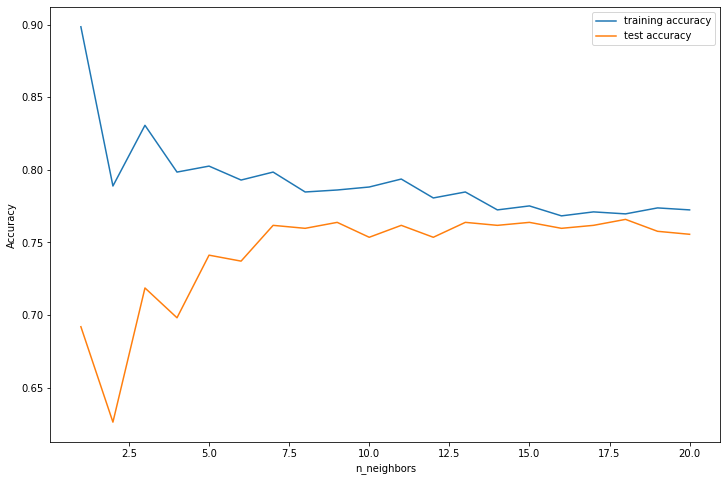

The optimal number of neighbors is: 18


In [43]:
#KNN
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data        = chef_class_data,
                                  y_data        = chef_class_target,
                                  response_type = 'class')

In [44]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_class_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(chef_class_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            chef_class_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chef_class_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7587
Testing  ACCURACY: 0.7454
AUC Score        : 0.6703


In [45]:
# calling the visual_cm function
#visual_cm(true_y = y_test,
#          pred_y = knn_pred,
#          labels = ['CROSS SUCCESS', 'Not SUCCESS'])

In [46]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 87
False Positives: 69
False Negatives: 42
True Positives : 289



In [47]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_class_data, chef_class_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-47-2840549dcf9e>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)


Tuned Parameters  : {'warm_start': False, 'solver': 'sag', 'C': 3.3000000000000003}
Tuned CV AUC      : 0.6869


In [48]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7587
LR Tuned Testing  ACCURACY: 0.77
LR Tuned AUC Score        : 0.6969


In [49]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 77
False Positives: 79
False Negatives: 33
True Positives : 298



In [50]:
# loading model performance
model_performance = pd.read_excel('./classification_model_performance.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6794,0.7608,0.7577,"(72, 84, 34, 297)"
1,Full Tree,0.6657,0.9232,0.7023,"(88, 68, 77, 254)"
2,Pruned Tree,0.7154,0.7526,0.7721,"(87, 69, 42, 289)"
3,Tuned LR,0.6969,0.7587,0.7700,"(77, 79, 33, 298)"


In [51]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_class_data, chef_class_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-51-c24c4eca6c99>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-51-c24c4eca6c99>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 9, 'max_depth': 8, 'criterion': 'gini'}
Tuned Training AUC: 0.6891


In [52]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7656
Testing  ACCURACY: 0.809
AUC Score        : 0.7545


In [53]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 94
False Positives: 62
False Negatives: 31
True Positives : 300



In [54]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree(FINAL MODEL)',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6794,0.7608,0.7577,"(72, 84, 34, 297)"
1,Full Tree,0.6657,0.9232,0.7023,"(88, 68, 77, 254)"
2,Pruned Tree,0.7154,0.7526,0.7721,"(87, 69, 42, 289)"
3,Tuned LR,0.6969,0.7587,0.7700,"(77, 79, 33, 298)"
4,Tuned Tree(FINAL MODEL),0.7545,0.7656,0.8090,"(94, 62, 31, 300)"


In [55]:
# displaying the tree
#display_tree(tree = tree_tuned,
 #            feature_df = chef_class_data,
 #            height = 800,
 #            width  = 800)

In [56]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [57]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9232
Testing  ACCURACY: 0.7495
AUC Score        : 0.6886


In [58]:
# plotting feature importances
#plot_feature_importances(rf_default_fit,
#                         train = x_train,
#                         export = False)

In [59]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 81
False Positives: 75
False Negatives: 47
True Positives : 284



In [60]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6794,0.7608,0.7577,"(72, 84, 34, 297)"
1,Full Tree,0.6657,0.9232,0.7023,"(88, 68, 77, 254)"
2,Pruned Tree,0.7154,0.7526,0.7721,"(87, 69, 42, 289)"
3,Tuned LR,0.6969,0.7587,0.7700,"(77, 79, 33, 298)"
4,Tuned Tree(FINAL MODEL),0.7545,0.7656,0.8090,"(94, 62, 31, 300)"
5,Random Forest,0.6886,0.9232,0.7495,"(81, 75, 47, 284)"


In [61]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_space  = pd.np.arange(100, 1100, 250)
#leaf_space       = pd.np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
 #             'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                              n_iter     = 1000,
#                              scoring    = make_scorer(roc_auc_score,
#                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(chef_class_data, chef_class_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [62]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False,
                       criterion='gini', 
                       min_samples_leaf=11,
                       n_estimators=850,
                       random_state=219,
                       warm_start=True,
                       ccp_alpha=0.0, 
                       class_weight=None,
                       max_depth=None, 
                       max_features='auto',
                       max_leaf_nodes=None,
                       max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_impurity_split=None,
                       min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       n_jobs=None, oob_score=False, 
                       verbose=0)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(chef_class_data, chef_class_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                      y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.782
Forest Tuned Testing  ACCURACY: 0.8008
Forest Tuned AUC Score        : 0.7281


In [63]:
# plotting feature importances
#plot_feature_importances(forest_tuned_fit,
 #                        train = x_train,
 #                        export = True)

In [64]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 82
False Positives: 74
False Negatives: 23
True Positives : 308



In [65]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6794,0.7608,0.7577,"(72, 84, 34, 297)"
1,Full Tree,0.6657,0.9232,0.7023,"(88, 68, 77, 254)"
2,Pruned Tree,0.7154,0.7526,0.7721,"(87, 69, 42, 289)"
3,Tuned LR,0.6969,0.7587,0.7700,"(77, 79, 33, 298)"
4,Tuned Tree(FINAL MODEL),0.7545,0.7656,0.8090,"(94, 62, 31, 300)"
5,Random Forest,0.6886,0.9232,0.7495,"(81, 75, 47, 284)"
6,Tuned Random Forest,0.7281,0.7820,0.8008,"(82, 74, 23, 308)"


In [66]:
#GBM
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7896
Testing ACCURACY : 0.77
AUC Score        : 0.702


In [67]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 80
False Positives: 76
False Negatives: 36
True Positives : 295



In [68]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Logit_sig6)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6794,0.7608,0.7577,"(72, 84, 34, 297)"
1,Full Tree,0.6657,0.9232,0.7023,"(88, 68, 77, 254)"
2,Pruned Tree,0.7154,0.7526,0.7721,"(87, 69, 42, 289)"
3,Tuned LR,0.6969,0.7587,0.7700,"(77, 79, 33, 298)"
4,Tuned Tree(FINAL MODEL),0.7545,0.7656,0.8090,"(94, 62, 31, 300)"
5,Random Forest,0.6886,0.9232,0.7495,"(81, 75, 47, 284)"
6,Tuned Random Forest,0.7281,0.7820,0.8008,"(82, 74, 23, 308)"
7,GBM (Logit_sig6),0.7020,0.7896,0.7700,"(80, 76, 36, 295)"


In [69]:
# declaring a hyperparameter space
#learn_space        = pd.np.arange(0.1, 2.0, 0.2)
#estimator_space    = pd.np.arange(100, 200, 25)
#depth_space        = pd.np.arange(1, 20, 2)
#warm_start_space   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_space,
#              'max_depth'     : depth_space,
#              'n_estimators'  : estimator_space,
#              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                           param_distributions = param_grid,
#                           cv                  = 3,
#                           n_iter              = 500,
#                          random_state        = 219,
#                           scoring             = make_scorer(roc_auc_score,
#                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(chef_class_data, chef_class_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [70]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, 
                           random_state=219,
                           warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(chef_class_data, chef_class_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.769
Testing  ACCURACY: 0.7988
AUC Score        : 0.735


In [71]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 87
False Positives: 69
False Negatives: 29
True Positives : 302



In [72]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6794,0.7608,0.7577,"(72, 84, 34, 297)"
1,Full Tree,0.6657,0.9232,0.7023,"(88, 68, 77, 254)"
2,Pruned Tree,0.7154,0.7526,0.7721,"(87, 69, 42, 289)"
3,Tuned LR,0.6969,0.7587,0.7700,"(77, 79, 33, 298)"
4,Tuned Tree(FINAL MODEL),0.7545,0.7656,0.8090,"(94, 62, 31, 300)"
5,Random Forest,0.6886,0.9232,0.7495,"(81, 75, 47, 284)"
6,Tuned Random Forest,0.7281,0.7820,0.8008,"(82, 74, 23, 308)"
7,GBM (Logit_sig6),0.7020,0.7896,0.7700,"(80, 76, 36, 295)"
8,Tuned GBM,0.7350,0.7690,0.7988,"(87, 69, 29, 302)"


In [73]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
4,Tuned Tree(FINAL MODEL),0.7545,0.7656,0.8090,"(94, 62, 31, 300)"
8,Tuned GBM,0.7350,0.7690,0.7988,"(87, 69, 29, 302)"
6,Tuned Random Forest,0.7281,0.7820,0.8008,"(82, 74, 23, 308)"
2,Pruned Tree,0.7154,0.7526,0.7721,"(87, 69, 42, 289)"
7,GBM (Logit_sig6),0.7020,0.7896,0.7700,"(80, 76, 36, 295)"
3,Tuned LR,0.6969,0.7587,0.7700,"(77, 79, 33, 298)"
5,Random Forest,0.6886,0.9232,0.7495,"(81, 75, 47, 284)"
0,Logistic,0.6794,0.7608,0.7577,"(72, 84, 34, 297)"
1,Full Tree,0.6657,0.9232,0.7023,"(88, 68, 77, 254)"


In [74]:
# saving the DataFrame to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)